# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# For gradient descent and optimization plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


 # Create a Synthetic Dataset

In [3]:
# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = (np.sin(X[:, 0]) + np.sin(X[:, 1]) > 0).astype(int)  # Binary classification based on sine function

# Create a DataFrame for visualization
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

df.to_csv(r'E:\synthetic_dataset.csv', index=False)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  100 non-null    float64
 1   Feature 2  100 non-null    float64
 2   Target     100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.1 KB


# Visualize the Data - Scatter Plot

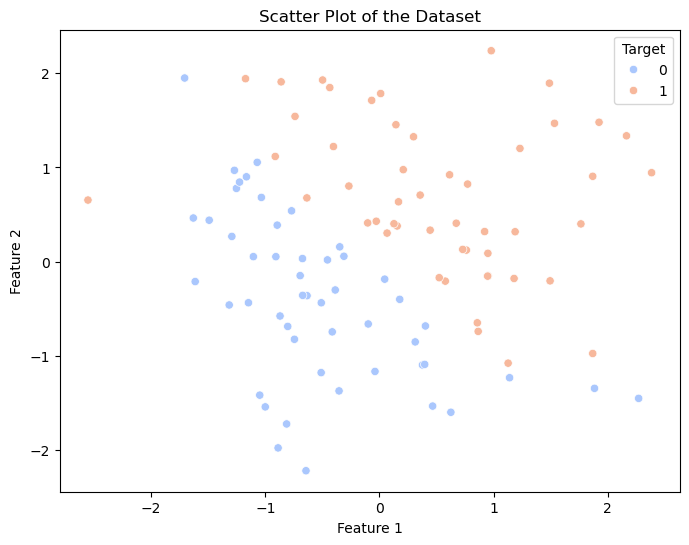

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Target', data=df, palette='coolwarm')
plt.title('Scatter Plot of the Dataset')
plt.show()


In [5]:
'''
Before diving into backpropagation, we need to understand the mathematical foundations:

Forward pass: Compute predictions.
Cost function: Measure how far predictions are from actual values.
Backpropagation: Calculate gradients using the chain rule for updating weights.
'''

'\nBefore diving into backpropagation, we need to understand the mathematical foundations:\n\nForward pass: Compute predictions.\nCost function: Measure how far predictions are from actual values.\nBackpropagation: Calculate gradients using the chain rule for updating weights.\n'

#  Define Activation Function (Sigmoid) and Its Derivative

In [53]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

sigmoid(z)
print("\n")
sigmoid_derivative(z)

# The sigmoid function is commonly used in binary classification neural networks.
# Its derivative will be used in backpropagation to compute weight updates.


array([4.53958077e-05, 5.55575620e-05, 6.79936937e-05, 8.32130942e-05,
       1.01838442e-04, 1.24631609e-04, 1.52524715e-04, 1.86658091e-04,
       2.28426653e-04, 2.79536554e-04, 3.42074339e-04, 4.18591319e-04,
       5.12206458e-04, 6.26731702e-04, 7.66824507e-04, 9.38173215e-04,
       1.14772200e-03, 1.40394326e-03, 1.71716676e-03, 2.09997591e-03,
       2.56768332e-03, 3.13889855e-03, 3.83620191e-03, 4.68693782e-03,
       5.72413978e-03, 6.98759437e-03, 8.52504404e-03, 1.03935138e-02,
       1.26607241e-02, 1.54065171e-02, 1.87241696e-02, 2.27213903e-02,
       2.75206964e-02, 3.32587242e-02, 4.00838615e-02, 4.81513998e-02,
       5.76152215e-02, 6.86149280e-02, 8.12573764e-02, 9.55919842e-02,
       1.11580066e-01, 1.29060077e-01, 1.47712989e-01, 1.67034879e-01,
       1.86326443e-01, 2.04710159e-01, 2.21183725e-01, 2.34711795e-01,
       2.44347497e-01, 2.49363393e-01, 2.49363393e-01, 2.44347497e-01,
       2.34711795e-01, 2.21183725e-01, 2.04710159e-01, 1.86326443e-01,
      

# Neural Network Forward Pass

In [55]:
def forward_pass(X, weights, bias):
    z = np.dot(X, weights) + bias
    return sigmoid(z)



# X: Input data.
# weights: Weights applied to each feature.
# bias: Bias term.
# This function calculates the output of the neural network using matrix multiplication followed by the activation function.

# Define Cost Function (Binary Cross-Entropy)

In [8]:
def compute_cost(y_true, y_pred):
    m = y_true.shape[0]
    cost = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return cost



# This is the binary cross-entropy loss function, commonly used for binary classification tasks.
# It measures how well the predictions align with the true labels.

#  Backpropagation - Gradient Calculation using Chain Rule

In [9]:
def backpropagation(X, y, y_pred, weights, bias):
    m = X.shape[0]

    # Compute gradients
    dz = y_pred - y
    dw = 1/m * np.dot(X.T, dz)
    db = 1/m * np.sum(dz)

    return dw, db





# dz: The difference between predictions and actual labels.
# dw: Gradient of the cost function with respect to weights.
# db: Gradient of the cost function with respect to bias.

# Initialize Parameters

In [10]:
def initialize_parameters(n_features):
    weights = np.random.randn(n_features, 1)
    bias = 0
    return weights, bias


#  Gradient Descent for Weight Updates

In [11]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_features = X.shape[1]
    weights, bias = initialize_parameters(n_features)
    costs = []

    for i in range(epochs):
        # Forward pass
        y_pred = forward_pass(X, weights, bias)

        # Compute cost
        cost = compute_cost(y, y_pred)
        costs.append(cost)

        # Backpropagation
        dw, db = backpropagation(X, y, y_pred, weights, bias)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, costs


# Train the Neural Network

In [12]:
# Convert y to the correct shape
y = y.reshape(-1, 1)

weights, bias, costs = gradient_descent(X, y)

# Print final weights and bias
print(f'Final Weights: {weights}')
print(f'Final Bias: {bias}')


Final Weights: [[1.10664985]
 [1.21607197]]
Final Bias: -0.08686731935999986


#  Visualize Cost Over Iterations (Line Chart)

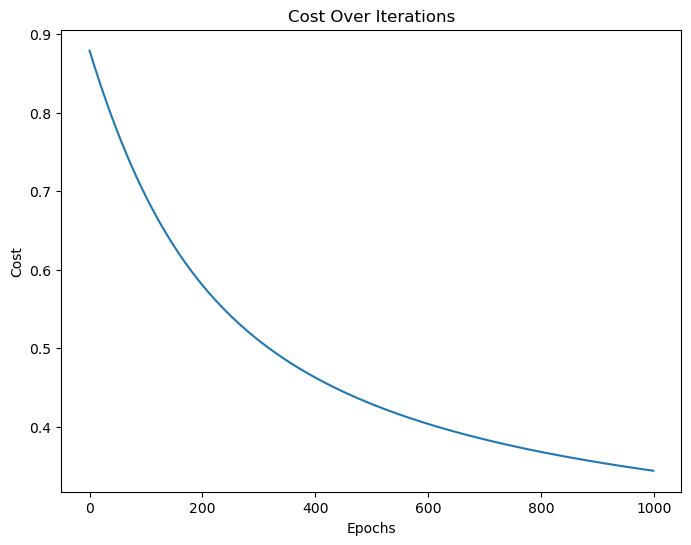

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(costs)
plt.title('Cost Over Iterations')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()


#  Regularization (L2)

In [14]:
def compute_cost_with_regularization(y_true, y_pred, weights, lambd):
    m = y_true.shape[0]
    cross_entropy_cost = compute_cost(y_true, y_pred)
    L2_regularization_cost = lambd / (2 * m) * np.sum(np.square(weights))
    return cross_entropy_cost + L2_regularization_cost


# Implementing Backpropagation with Regularization

In [15]:
def backpropagation_with_regularization(X, y, y_pred, weights, bias, lambd):
    m = X.shape[0]

    # Compute gradients
    dz = y_pred - y
    dw = 1/m * np.dot(X.T, dz) + (lambd / m) * weights
    db = 1/m * np.sum(dz)

    return dw, db


# Gradient Descent with Regularization

In [16]:
def gradient_descent_with_regularization(X, y, lambd=0.1, learning_rate=0.01, epochs=1000):
    n_features = X.shape[1]
    weights, bias = initialize_parameters(n_features)
    costs = []

    for i in range(epochs):
        # Forward pass
        y_pred = forward_pass(X, weights, bias)

        # Compute cost with regularization
        cost = compute_cost_with_regularization(y, y_pred, weights, lambd)
        costs.append(cost)

        # Backpropagation with regularization
        dw, db = backpropagation_with_regularization(X, y, y_pred, weights, bias, lambd)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, costs


# Training with Regularization

In [17]:
weights_reg, bias_reg, costs_reg = gradient_descent_with_regularization(X, y)

# Print final weights and bias after regularization
print(f'Final Weights with Regularization: {weights_reg}')
print(f'Final Bias with Regularization: {bias_reg}')


Final Weights with Regularization: [[1.49616932]
 [1.55222708]]
Final Bias with Regularization: -0.10452964846342117


# Visualize Cost Over Iterations (with Regularization)

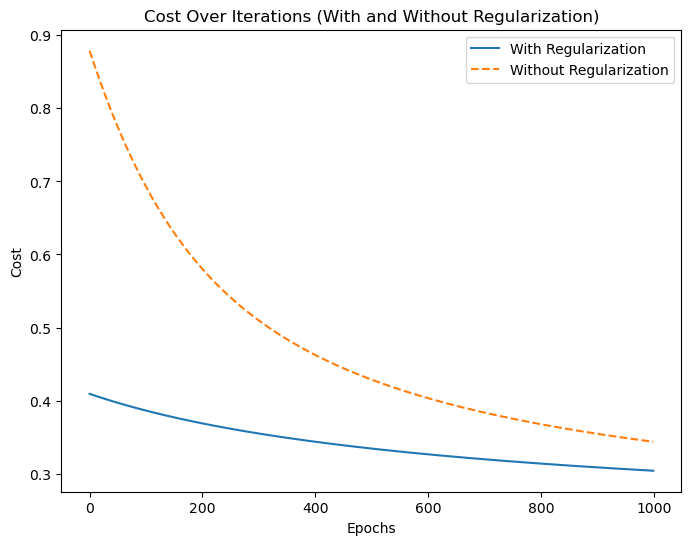

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(costs_reg, label='With Regularization')
plt.plot(costs, label='Without Regularization', linestyle='--')
plt.title('Cost Over Iterations (With and Without Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()


# Visualize the Final Decision Boundary (Heatmap)

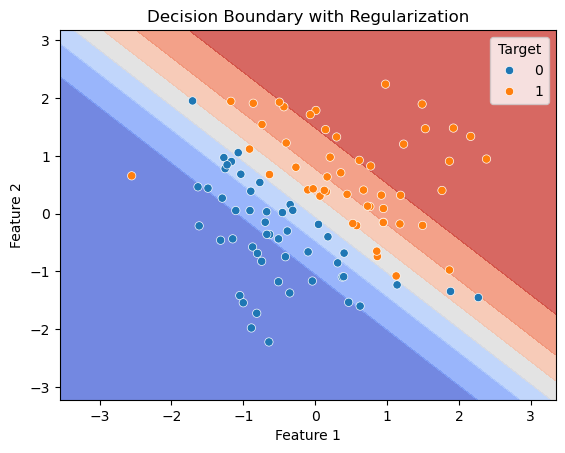

In [19]:
# Generate a grid of points to visualize decision boundary
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on the grid
Z = forward_pass(grid, weights_reg, bias_reg)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Target', data=df)
plt.title('Decision Boundary with Regularization')
plt.show()


# Explore Backpropagation Further (Derivative Visualization)

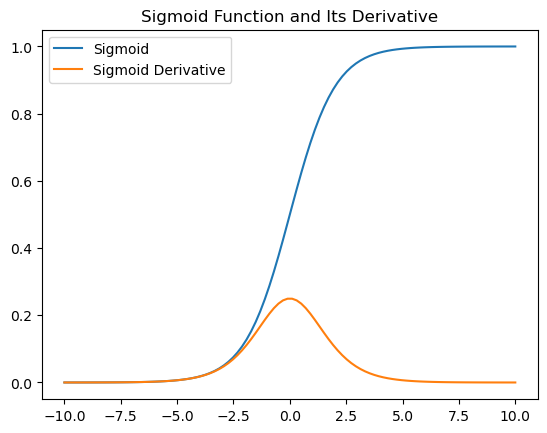

In [21]:
z_values = np.linspace(-10, 10, 100)
sig_values = sigmoid(z_values)
sig_deriv_values = sigmoid_derivative(z_values)

plt.plot(z_values, sig_values, label='Sigmoid')
plt.plot(z_values, sig_deriv_values, label='Sigmoid Derivative')
plt.title('Sigmoid Function and Its Derivative')
plt.legend()
plt.show()


# Add Momentum to Gradient Descent

In [22]:
def gradient_descent_with_momentum(X, y, learning_rate=0.01, epochs=1000, momentum=0.9):
    n_features = X.shape[1]
    weights, bias = initialize_parameters(n_features)
    v_dw, v_db = np.zeros_like(weights), 0  # Initialize momentum terms
    costs = []

    for i in range(epochs):
        y_pred = forward_pass(X, weights, bias)
        cost = compute_cost(y, y_pred)
        costs.append(cost)

        dw, db = backpropagation(X, y, y_pred, weights, bias)

        # Apply momentum
        v_dw = momentum * v_dw + (1 - momentum) * dw
        v_db = momentum * v_db + (1 - momentum) * db

        weights -= learning_rate * v_dw
        bias -= learning_rate * v_db

    return weights, bias, costs


#  Implement RMSProp Optimization

In [23]:
def gradient_descent_with_rmsprop(X, y, learning_rate=0.001, epochs=1000, beta=0.9, epsilon=1e-8):
    n_features = X.shape[1]
    weights, bias = initialize_parameters(n_features)
    s_dw, s_db = np.zeros_like(weights), 0  # Initialize RMSProp terms
    costs = []

    for i in range(epochs):
        y_pred = forward_pass(X, weights, bias)
        cost = compute_cost(y, y_pred)
        costs.append(cost)

        dw, db = backpropagation(X, y, y_pred, weights, bias)

        # Update with RMSProp
        s_dw = beta * s_dw + (1 - beta) * np.square(dw)
        s_db = beta * s_db + (1 - beta) * np.square(db)

        weights -= learning_rate * dw / (np.sqrt(s_dw) + epsilon)
        bias -= learning_rate * db / (np.sqrt(s_db) + epsilon)

    return weights, bias, costs


# Add Adam Optimizer

In [44]:
def adam_optimizer(X, y, learning_rate=0.001, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    n_features = X.shape[1]
    weights, bias = initialize_parameters(n_features)
    costs = []

    # Initialize moment estimates
    m_w, v_w = np.zeros_like(weights), np.zeros_like(weights)
    m_b, v_b = 0, 0

    for i in range(1, epochs + 1):
        # Forward pass
        y_pred = forward_pass(X, weights, bias)

        # Compute cost
        cost = compute_cost(y, y_pred)
        costs.append(cost)

        # Backpropagation
        dw, db = backpropagation(X, y, y_pred, weights, bias)

        # Update moment estimates
        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        m_b = beta1 * m_b + (1 - beta1) * db
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        # Correct bias for moment estimates
        m_w_corr = m_w / (1 - beta1 ** i)
        v_w_corr = v_w / (1 - beta2 ** i)
        m_b_corr = m_b / (1 - beta1 ** i)
        v_b_corr = v_b / (1 - beta2 ** i)

        # Update parameters
        weights -= learning_rate * m_w_corr / (np.sqrt(v_w_corr) + epsilon)
        bias -= learning_rate * m_b_corr / (np.sqrt(v_b_corr) + epsilon)

    return weights, bias, costs


#  Visualizing Adam Optimizer Performance

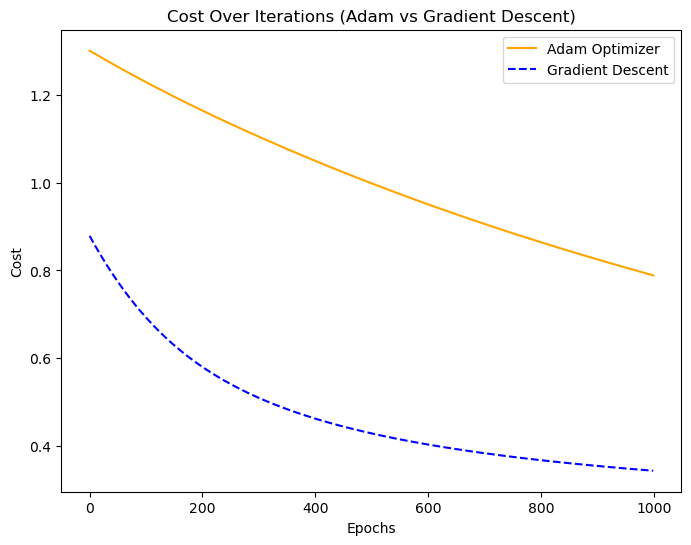

In [45]:
weights_adam, bias_adam, costs_adam = adam_optimizer(X, y)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(costs_adam, label='Adam Optimizer', color='orange')
plt.plot(costs, label='Gradient Descent', linestyle='--', color='blue')
plt.title('Cost Over Iterations (Adam vs Gradient Descent)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()


#  Implement Learning Rate Scheduling

In [25]:
def learning_rate_schedule(epoch, initial_rate=0.01, decay_rate=0.95):
    return initial_rate * (decay_rate ** epoch)


# Add Data Normalization

In [26]:
def normalize_data(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)


# Add Dropout Regularization

In [27]:
def apply_dropout(A, keep_prob=0.8):
    mask = np.random.rand(A.shape[0], A.shape[1]) < keep_prob
    A *= mask
    A /= keep_prob
    return A


# Add Xavier Initialization for Weights

In [28]:
def initialize_parameters_xavier(n_features):
    weights = np.random.randn(n_features, 1) * np.sqrt(1 / n_features)
    bias = 0
    return weights, bias


# Early Stopping for Gradient Descent

In [29]:
def early_stopping(costs, patience=10, threshold=1e-4):
    if len(costs) < patience:
        return False
    recent_costs = costs[-patience:]
    return max(recent_costs) - min(recent_costs) < threshold


# Create Precision, Recall, and F1-Score Functions

In [30]:
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r)


# Visualize Decision Boundary After Training (Heatmap)

In [31]:
def plot_decision_boundary(X, y, weights, bias):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = forward_pass(grid, weights, bias)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Decision Boundary")
    plt.show()


# Implement Batch Gradient Descent

In [32]:
def batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, epochs=1000):
    n_features = X.shape[1]
    weights, bias = initialize_parameters(n_features)
    m = X.shape[0]
    costs = []

    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            y_pred = forward_pass(X_batch, weights, bias)
            dw, db = backpropagation(X_batch, y_batch, y_pred, weights, bias)

            weights -= learning_rate * dw
            bias -= learning_rate * db

        cost = compute_cost(y, forward_pass(X, weights, bias))
        costs.append(cost)

    return weights, bias, costs


# Implement Stochastic Gradient Descent (SGD)

In [33]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_features = X.shape[1]
    weights, bias = initialize_parameters(n_features)
    m = X.shape[0]
    costs = []

    for epoch in range(epochs):
        for i in range(m):
            X_sample = X[i].reshape(1, -1)
            y_sample = y[i].reshape(1, -1)

            y_pred = forward_pass(X_sample, weights, bias)
            dw, db = backpropagation(X_sample, y_sample, y_pred, weights, bias)

            weights -= learning_rate * dw
            bias -= learning_rate * db

        cost = compute_cost(y, forward_pass(X, weights, bias))
        costs.append(cost)

    return weights, bias, costs


# Add L1 and L2 Regularization in Backpropagation

In [34]:
def compute_cost_with_regularization(y_true, y_pred, weights, lambd=0.01):
    m = y_true.shape[0]
    cost = (-1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    l2_regularization = (lambd/(2*m)) * np.sum(np.square(weights))
    return cost + l2_regularization


# Add Confusion Matrix Visualization

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Implement K-Fold Cross Validation

In [36]:
from sklearn.model_selection import KFold

def k_fold_cross_validation(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True)
    fold_results = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        weights, bias, _ = gradient_descent(X_train, y_train)
        y_pred = predict(X_test, weights, bias)
        accuracy = accuracy_score(y_test, y_pred)
        fold_results.append(accuracy)

    return np.mean(fold_results)


# Implement Learning Rate Finder

In [37]:
def learning_rate_finder(X, y, initial_lr=1e-7, final_lr=10, epochs=100):
    learning_rates = np.geomspace(initial_lr, final_lr, num=epochs)
    costs = []
    
    for lr in learning_rates:
        weights, bias, cost = gradient_descent(X, y, learning_rate=lr, epochs=1)
        costs.append(cost[-1])
    
    plt.plot(learning_rates, costs)
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Cost')
    plt.title('Learning Rate Finder')
    plt.show()


#  Visualize Activation Function Comparison

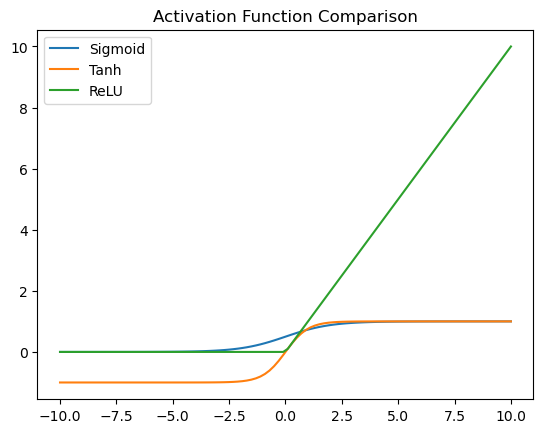

In [38]:
z = np.linspace(-10, 10, 100)

sigmoid_z = sigmoid(z)
tanh_z = np.tanh(z)
relu_z = np.maximum(0, z)

plt.plot(z, sigmoid_z, label="Sigmoid")
plt.plot(z, tanh_z, label="Tanh")
plt.plot(z, relu_z, label="ReLU")
plt.legend()
plt.title("Activation Function Comparison")
plt.show()


# Implement Feature Scaling Methods (MinMaxScaler, StandardScaler)

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()  # Or use StandardScaler
X_scaled = scaler.fit_transform(X)


#  Visualize Weight Distributions During Training

In [40]:
def plot_weight_distributions(weights_history):
    plt.figure(figsize=(10, 5))
    for i, weights in enumerate(weights_history):
        sns.histplot(weights, kde=True, label=f'Epoch {i+1}')
    plt.title('Weight Distributions Over Time')
    plt.legend()
    plt.show()


# Visualize Model Training with TensorBoard (Advanced)

In [47]:
from torch.utils.tensorboard import SummaryWriter

# Define number of epochs and initialize writer
epochs = 10  # Set to the desired number of epochs
writer = SummaryWriter()

# Simulate a training loop
for epoch in range(epochs):
    # Assume cost is calculated somewhere during training
    # For demonstration, we'll simulate it with a random value
    cost = 0.05 * (epochs - epoch)  # Example cost decreasing over time

    # Log training loss
    writer.add_scalar('Training Loss', cost, epoch)

    # Add other metrics if needed (e.g., accuracy)
    # writer.add_scalar('Training Accuracy', accuracy, epoch)

# Close the writer after logging
writer.close()


# Final Model Export

In [49]:
# Example of resolving the NameError by defining a model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load sample data
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully.")


Model saved successfully.
